In [ ]:
"""CalCOFI: Over 60 years of oceanographic data: Is there a relationship between
water salinity & water temperature? Can you predict the water temperature based 
on salinity?"""

In [154]:
# Data from CalCOFI: https://www.kaggle.com/sohier/calcofi

In [1]:
import pandas as pd

In [130]:
bottle = 'bottle.csv'

dataframe_bottle = pd.read_csv(bottle,
                        sep=',',
                        low_memory=False)

In [131]:
dataframe_bottle = dataframe_bottle.reset_index()

In [132]:
linear_dataframe = dataframe_bottle[['Salnty', 'T_degC']]
linear_dataframe.columns = ['Salinity' , 'Temperature (C)']
linear_dataframe.head()

,Salinity,Temperature (C)
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [ ]:
for content in linear_dataframe:
    linear_dataframe.dropna(subset=['Salinity'], inplace=True)
    linear_dataframe.dropna(subset=['Temperature (C)'], inplace=True)

In [134]:
A = linear_dataframe.iloc[:, 0].values.reshape(-1, 1)
B = linear_dataframe.iloc[:, 1].values.reshape(-1, 1)

In [135]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, 
                                                    test_size=0.15, 
                                                    random_state=100,
                                                    shuffle=True)

In [136]:
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression().fit(A_train, B_train)

In [161]:
pred_2 = model_2.predict(B_test)

print(pred_2)

[[ 74.93321269]
 [137.38360212]
 [118.52367696]
 ...
 [120.55759046]
 [110.48047359]
 [ 81.03495318]]


In [157]:
from sklearn.metrics import r2_score

print('r2 score of the test set [coefficient of determination]: ', r2_score(B_test, pred_2))

r2 score of the test set [coefficient of determination]:  -661.1802889822171


In [156]:
print('intercept ', model_2.intercept_)
print('slope ', model_2.coef_)

intercept  [167.29137559]
slope  [[-4.62253068]]


In [160]:
pred_2 = model_2.intercept_ + model_2.coef_ * A_test

print(pred_2)

[[10.44890977]
 [ 9.52902617]
 [ 7.58756328]
 ...
 [14.12844419]
 [13.4073294 ]
 [ 5.13299949]]


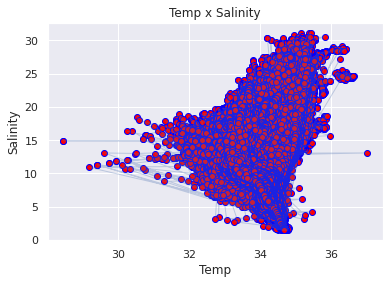

In [162]:
import matplotlib.pyplot as plt

plt.scatter(linear_dataframe.iloc[:, 0], linear_dataframe.iloc[:, 1], 
            color='red',
            edgecolors='blue')

plt.plot(A, B, linewidth=1, alpha=0.3)
plt.title('Temp x Salinity')
plt.xlabel('Temp')
plt.ylabel('Salinity')
plt.show()

In [167]:
pred_3 = model_2.intercept_ + model_2.coef_ * A_test

print(pred_3)

[[10.44890977]
 [ 9.52902617]
 [ 7.58756328]
 ...
 [14.12844419]
 [13.4073294 ]
 [ 5.13299949]]


In [164]:
pred_3 = model_2.predict(A_test)

print(pred_3)

[[10.44890977]
 [ 9.52902617]
 [ 7.58756328]
 ...
 [14.12844419]
 [13.4073294 ]
 [ 5.13299949]]


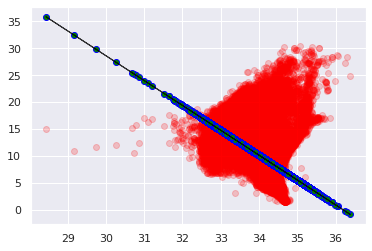

In [168]:
plt.scatter(A_test, B_test, color='red', alpha=0.2)
plt.scatter(A_test, pred_3, color='green', edgecolors='blue')
plt.plot(A_test, pred_3, color='black', linewidth=1, alpha=0.8)
plt.show()

In [169]:
axis_x = np.array(linear_dataframe['Salinity'])
axis_y = np.array(linear_dataframe['Temperature (C)'])

m = np.polyfit(x=axis_x, y=axis_y, deg=1)

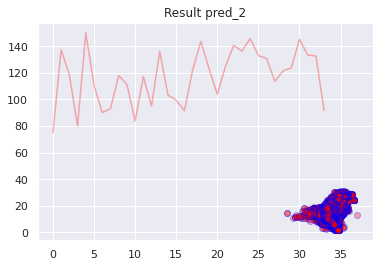

In [170]:
plt.scatter(linear_dataframe.iloc[:, 0], linear_dataframe.iloc[:, 1], 
            color='red',
            edgecolor='blue',
            alpha=0.3)

plt.title('Result pred_2')
plt.plot(pred_2[0:34, :], alpha=0.3, color='red')
plt.show()

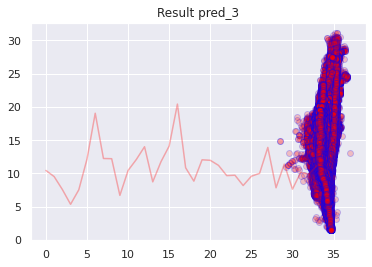

In [171]:
plt.scatter(linear_dataframe.iloc[:, 0], linear_dataframe.iloc[:, 1], 
            color='red',
            edgecolor='blue',
            alpha=0.2)

plt.title('Result pred_3')
plt.plot(pred_3[0:34, :], alpha=0.3, color='red')
plt.show()

In [172]:
training_score = model_2.score(A_train, B_train)

print(training_score)

0.25539809763753396


In [173]:
test_score = model_2.score(A_test, B_test)

print(test_score)

0.2547002108253371
